In [3]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:] # 2번째, 3번째 열만
y = data.target
feature_names = [name[:-5] for name in data.feature_names[2:]]
print(feature_names)

# 모형 생성
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="entropy", # 분류품질 기준
                                 max_depth=1,
                                 random_state=0)
dt_model.fit(X, y) # depth가 1이라 성능이 좋지 않을 예정
print(X[130])
test_x = [[6.1, 1.9]]
print('예측값 :', dt_model.predict(test_x))
print(dt_model.classes_)
print(dt_model.predict_proba(test_x))

['petal length', 'petal width']
[6.1 1.9]
예측값 : [1]
[0 1 2]
[[0.  0.5 0.5]]


In [8]:
# 분류모형의 시각화
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
draw_decision_tree(dt_model, feature_names)

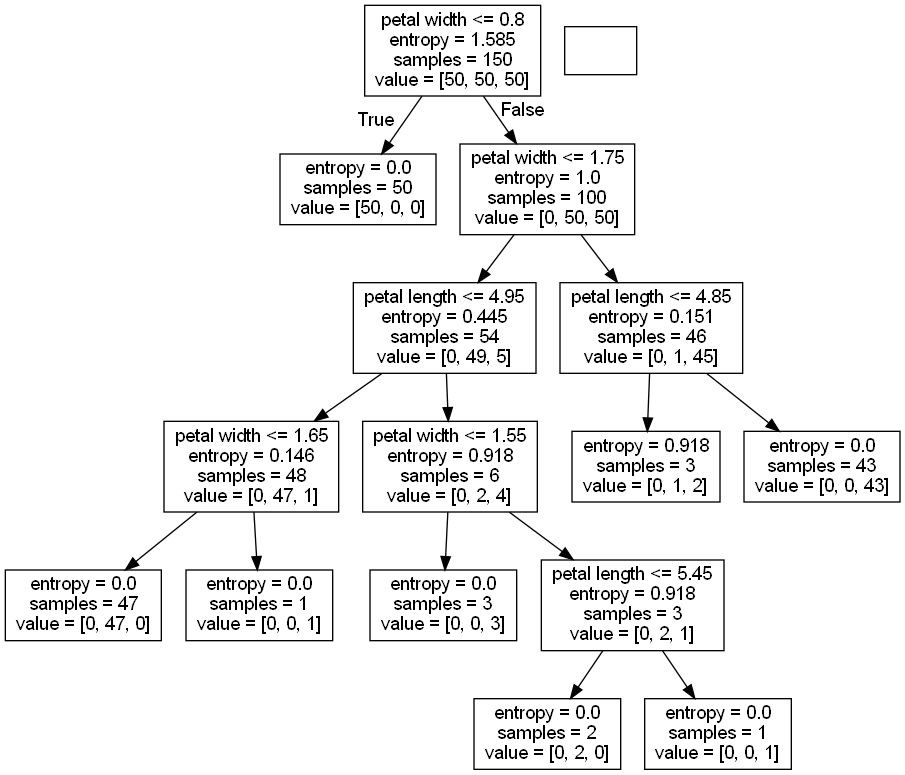

In [11]:
dt_model5 = DecisionTreeClassifier(criterion="entropy",
                                  max_depth=5,
                                  random_state=0)
dt_model5.fit(X,y)
draw_decision_tree(dt_model5, feature_names)